<img src="./logo_UTN.svg" align="right" width="150" />

#### Procesamiento Digital de Señales
# TS3: Ruido de Cuantización
#### Eloy Silva

### Generación de la señal senoidal. Usamos el generador de señales de la TS1

In [14]:
import numpy as np

from ts1_generador import signal_generator
import matplotlib.pyplot as plt    

fs = 800        #Frecuencia de muestro
N = fs          #Cantidad de muestras para k=1
f0 = 1          #Frecuencia de la señal
A = 1.5         #Amplitud de la señal original
DC = 0
phi = 0

t, Sr = signal_generator(A, DC, f0, phi, N, fs) #Llamada a la función generador

### Agregado de ruido de cuantización para:
#### Vfs = 2V, B = 4, 8 y 16 bits

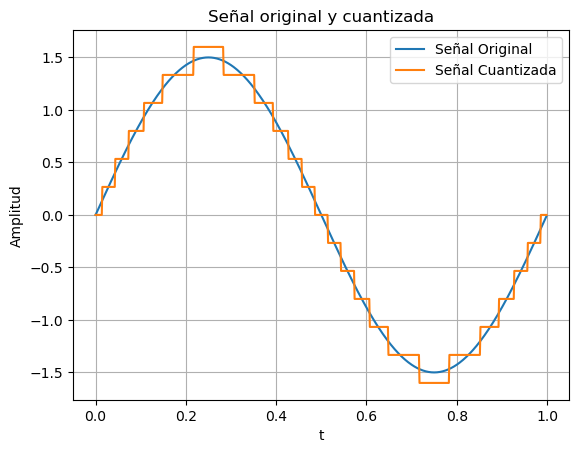

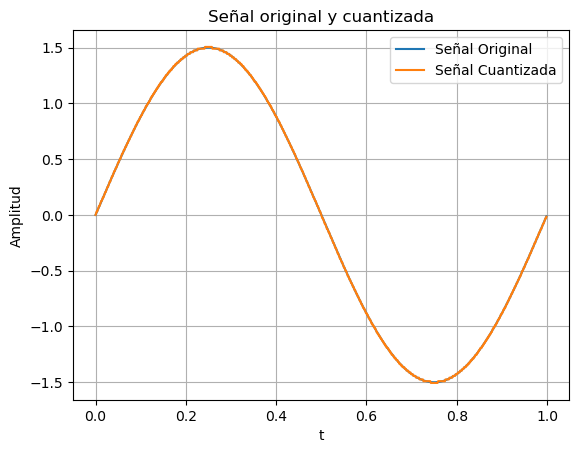

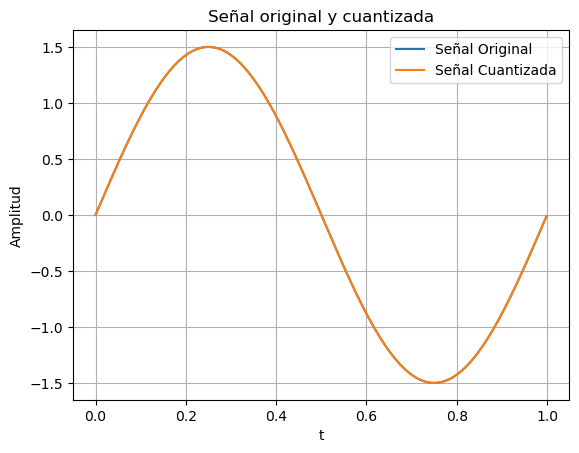

In [15]:
B = [4, 8, 16]      #Numero de bits
Vf = 2              #Tensión full scale

for b in B:
    q = 2*Vf/((2**b)-1) #Paso de cuantización
    Sq = np.round(Sr/q)*q
    
    plt.figure()
    plt.plot(t, Sr, label='Señal Original')
    plt.plot(t, Sq, label='Señal Cuantizada')
    plt.legend()
    plt.title('Señal original y cuantizada')
    plt.xlabel('t')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

### Comparación de la señal de error vs una distribución uniforme para:
#### Vfs = 2V, B = 8 bits

Media de la señal de error:  1.5439038936193583e-18
Media de una distribución uniforme en el rango -q/2 ; q/2:  3.7465480536498596e-07

Desvío de una distribución uniforme en el rango -q/2 ; q/2:  0.004468585819158937
Desvío de la señal de error:  0.004627553360472184




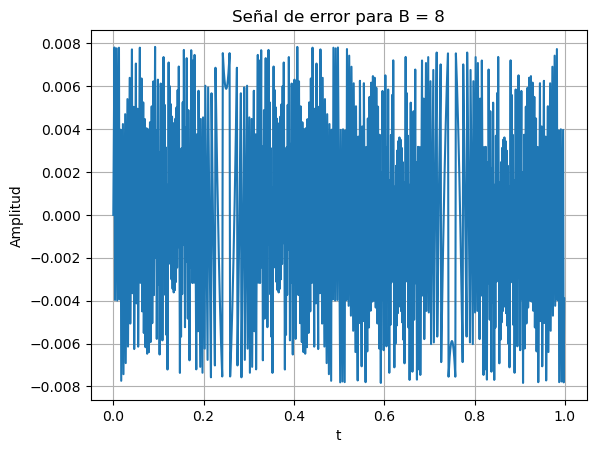

In [16]:
b = 8                   #Numero de bits
q = 2*Vf/((2**b)-1)     #Paso de cuantización
Sq = np.round(Sr/q)*q

e = Sq - Sr                                               #Señal de error
q_uniform = np.random.uniform(-q/2, q/2, size=Sq.shape)   #Distribución uniforme aleatoria

print("Media de la señal de error: ", np.mean(e))
print("Media de una distribución uniforme en el rango -q/2 ; q/2: ", np.mean(q_uniform))

print("\nDesvío de una distribución uniforme en el rango -q/2 ; q/2: ", np.std(q_uniform))
print("Desvío de la señal de error: ", np.std(e))
print("\n")

plt.plot(t, e)
plt.title('Señal de error para B = 8')
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()